# Première séance: TD 0 Statistiques étonnantes

## Exercice 1

<table>
    <thead>
        <tr>
            <td>Nombre d'enfants</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
            <td>6</td>
            <td>7 (ou plus)</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Nombre de familles</td>
            <td>438</td>
            <td>366</td>
            <td>142</td>
            <td>21</td>
            <td>18</td>
            <td>12</td>
            <td>3</td>
        </tr>
    </tbody>
</table>

On définit le tableau de données pour R. Les c() permettent de créer des listes, et le data.frame regroupe les listes pour en faire un tableau.

In [2]:
liste_enfant= c(1,2,3,4,5,6,7)
liste_famille = c(438,366,142,21,18,12,3)

In [5]:
datas = data.frame(Enfants = liste_enfant, Familles = liste_famille)

On vérifie ce qu'on a entré dans le data avec $. 

datas$Enfants redonne la liste des enfants. 

In [4]:
datas$Enfants

[1] 1 2 3 4 5 6 7

In [6]:
datas$Familles

[1] 438 366 142  21  18  12   3

On cherche maintenant à calculer la moyenne d'enfants par famille. Pour cela, on peut soit calculer: 
$(1 * 438 + 2 * 366 + 3*142+4*21+5*18+6*12+7*3)/1000$: 

In [7]:
(1 * 438 + 2 * 366 + 3*142+4*21+5*18+6*12+7*3)/1000

[1] 1.863

Soit calculer avec les listes:

In [9]:
liste_produit = liste_enfant * liste_famille
liste_produit

[1] 438 732 426  84  90  72  21

In [11]:
moyenne = sum(liste_produit)/1000
moyenne

[1] 1.863

Pour voir la moyenne "côté enfant", on fait le nouveau calcul d'effectif: on a 7 * 3 enfants qui répondent qu'ils sont 7 dans leur famille. On obtient donc le tableau suivant: 

<table>
    <thead>
        <tr>
            <td>Nombre d'enfants</td>
            <td>1</td>
            <td>2</td>
            <td>3</td>
            <td>4</td>
            <td>5</td>
            <td>6</td>
            <td>7 (ou plus)</td>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>Nombre de familles</td>
            <td>438 *1</td>
            <td>366 *2</td>
            <td>142 *3</td>
            <td>21 *4</td>
            <td>18 *5</td>
            <td>12 *6</td>
            <td>3 *7</td>
        </tr>
    </tbody>
</table>

In [12]:
liste_effectif = liste_enfant * liste_famille
nouveau_data = data.frame(Enfants = liste_enfant, Effectif = liste_effectif)
nouveau_data

Enfants,Effectif
1,438
2,732
3,426
4,84
5,90
6,72
7,21


In [16]:
liste_produit = liste_enfant * liste_effectif
moyenne = sum(liste_produit)/sum(liste_effectif)
moyenne

[1] 2.439614

## Exercice 2: 

On considère la population générale, avec un effectif de 100000 personnes. 

In [20]:
pop_generale_mortalite = data.frame(Age = c(0,2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100), 
                                   Effectif = c(360, 70, 91, 391, 613, 1246, 3210, 6536, 11534, 25156, 38360, 12433))
pop_generale_mortalite

Age,Effectif
0,360
2,70
10,91
20,391
30,613
40,1246
50,3210
60,6536
70,11534
80,25156


On considère la sous-population des médecins, composée de 334 personnes. 

In [21]:
pop_med_mortalite= data.frame(Age = c(0,2, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),
                              Effectif = c(0,0,0,0,2, 4, 11, 22, 39, 85, 129, 42))
pop_med_mortalite

Age,Effectif
0,0
2,0
10,0
20,0
30,2
40,4
50,11
60,22
70,39
80,85


On calcule maintenant la moyenne pour la population générale (l'espérance de vie): 
$$\frac{\sum_{i=1}^n \text{age} * \text{effectif} }{n}$$

In [22]:
moyenne_generale = sum(pop_generale_mortalite$Age * pop_generale_mortalite$Effectif)/100000
moyenne_generale

[1] 81.4532

On calcule de la même manière la moyenne pour la population de médecin: 

In [23]:
moyenne_med = sum(pop_med_mortalite$Age * pop_med_mortalite$Effectif)/334
moyenne_med

[1] 82.12575

On peut faire un diagramme en barres pour comparer ce qu'il se passe. D'abord, on fait un grand tableau des effectifs (quand 360 individus meurent dans la population à "0 ans", 0 médecins meurent à "0 ans") 

In [51]:
frequence_generale= pop_generale_mortalite$Effectif/100000
frequence_med = pop_med_mortalite$Effectif/334

donnees_totales=t(matrix(c(frequence_generale, frequence_med ),
                        nc = 2))
colnames(donnees_totales) <- c('0','2', '10', '20', '30', '40', '50', '60', '70', '80', '90', '100')
donnees_totales

0,2,10,20,30,40,50,60,70,80,90,100
0.0036,7e-04,0.00091,0.00391,0.006130000,0.01246000,0.03210000,0.06536000,0.1153400,0.251560,0.3836000,0.1243300
0.0000,0e+00,0.00000,0.00000,0.005988024,0.01197605,0.03293413,0.06586826,0.1167665,0.254491,0.3862275,0.1257485


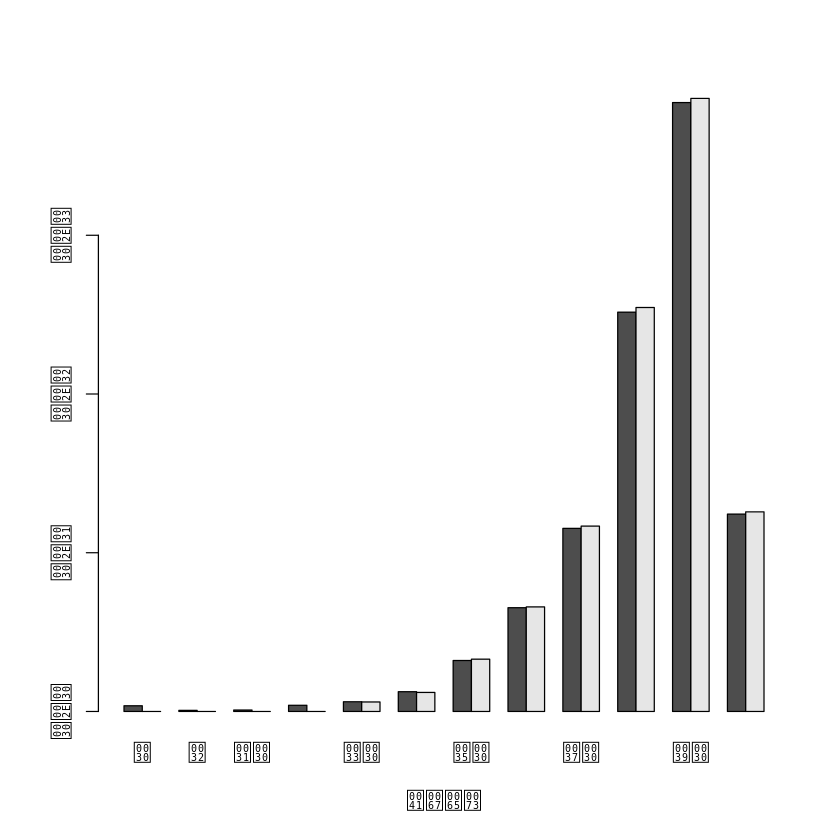

In [53]:
barplot(donnees_totales,beside=T, xlab="Ages")

[1]   0   0   0   0   2   4  11  22  39  85 129  42